# Monte-Carlo

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

## Exercice 1:

Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.

Commençons à tester 3 façon différentes de générer une gaussienne. Les deux premières sont des versions plus directe pour générer une gaussienne (avec plus ou moins de souplesse) tandis que la dernière est une approximation plus importante car n'est théoriquement valide que lorsque le théorème de Moivre-Laplace le permet.

In [2]:
nx=101
xi=np.linspace(0.,100.,nx)
binwidth=1 #Défini la largeur des colonnes
binss=np.arange(0.,101., binwidth)
xc=(binss[:-1])+binwidth/2
mu, sigma = 50.5, 5 #correspond à mu=n*p et sigma = p* sqrt(n) /!\ Nous avons décalé les colonnes
mooc = np.exp(-0.5*((xc - mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
binom = np.random.binomial(n=100, p=0.5, size=10000)
gauss = np.random.normal(mu, sigma, size=10000)

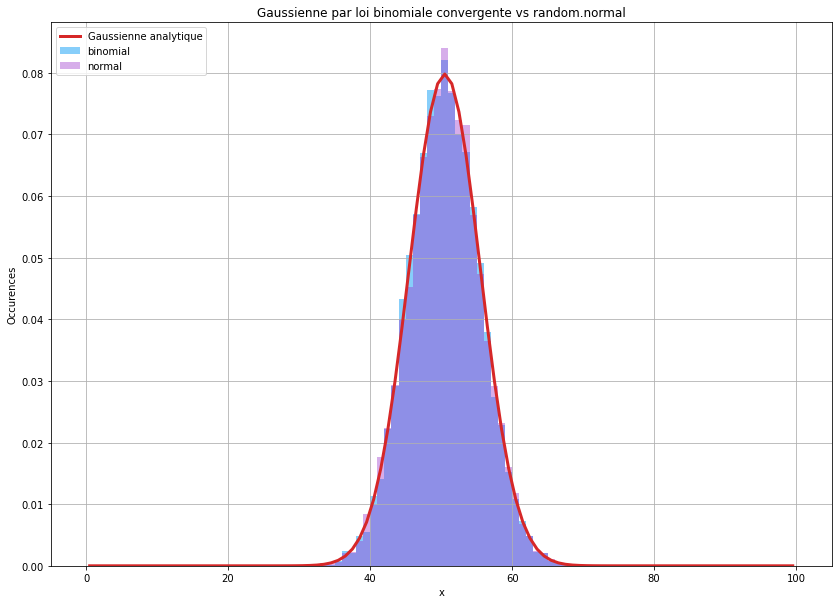

In [3]:
plt.figure(figsize=(14,10))
plt.title('Gaussienne par loi binomiale convergente vs random.normal')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.plot(xc, mooc, label='Gaussienne analytique',
            color='C3', linestyle='-',lw=3)
plt.hist(binom, bins=binss, density=True, color="lightskyblue",label='binomial')
plt.hist(gauss, bins=binss, density=True, color="darkorchid", alpha=0.4, label='normal');
plt.legend(loc='upper left')
plt.grid()

In [4]:
nx=101
xi=np.linspace(-5.,5.,nx)
binwidth=0.1 #Défini la largeur des colonnes
b=np.arange(-5.,5.2, binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = b[:-1] + binwidth/2 # Centrons nos bins
mu, sigma = 0, 1
defin= np.exp(-0.5*((xc - mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
normal = np.random.normal(mu, sigma, size=10000)

(-5, 5)

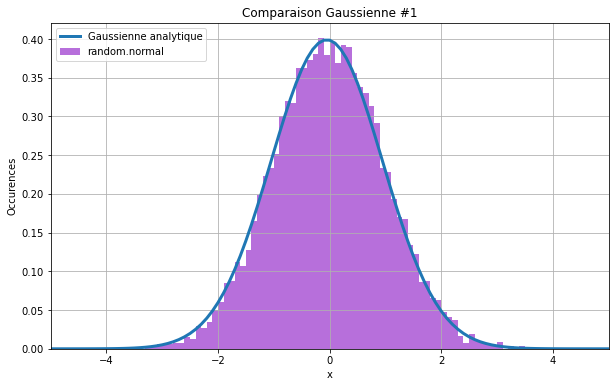

In [5]:
plt.figure(figsize=(10,6))
plt.title('Comparaison Gaussienne #1')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.plot(xi, defin, label='Gaussienne analytique',
            color='C0', linestyle='-',lw=3)
plt.hist(normal, bins=b, density=True, color="darkorchid", alpha=0.7, label='random.normal');
plt.legend(loc='upper left')
plt.grid()
plt.xlim(-5,5)
#condition= normal<defin
#e=np.extract(condition, nomal)
#print(e.size/normal.size)

(-5.0, 5.0)

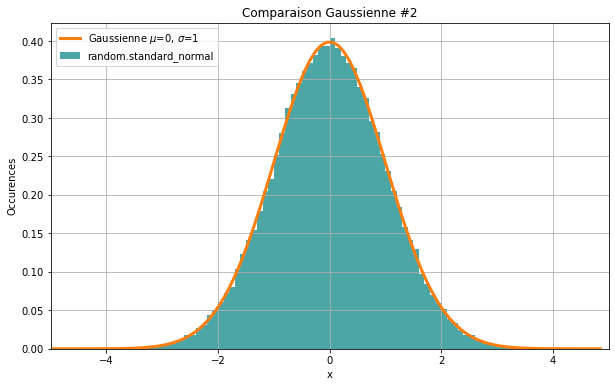

In [6]:
Standgau=np.random.standard_normal(100000) #Par défaut moyenne=0 et sigma=1


binwidth=0.1 #Défini la largeur des colonnes
bins=np.arange(-5.,5., binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins


plt.figure(figsize=(10,6))
plt.title('Comparaison Gaussienne #2')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(Standgau,bins=np.arange(-5.,5., binwidth),density=True, color="teal", alpha=0.7, label='random.standard_normal')
plt.plot(xc,np.exp(-0.5*(xc)**2)/(np.sqrt(2*np.pi)),label='Gaussienne $\\mu$=0, $\\sigma$=1',
            color='C1', linestyle='-',lw=3)
plt.legend(loc='upper left')
plt.grid()
plt.xlim(-5.,5.)

Testons maintenant, deux générateurs d'exponentiels: le random.standard.exponential et le random.exponential. 
Comme précédemment, la première est une version "standardisée" tandis que la seconde nous laisse un peu plus de souplesse.

(0.0, 5.0)

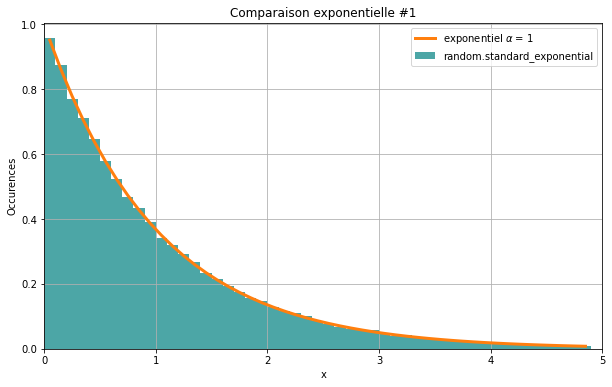

In [7]:
Standexp=np.random.standard_exponential(100000) #Par défaut alpha=1


binwidth=0.1 #Défini la largeur des colonnes
bins=np.arange(0.,5., binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins


plt.figure(figsize=(10,6))
plt.title('Comparaison exponentielle #1')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(Standexp,bins=np.arange(0.,5., binwidth),density=True, color="teal", alpha=0.7, label='random.standard_exponential')
plt.plot(xc,1*np.exp(-1*xc),label='exponentiel $\\alpha$ = 1',
            color='C1', linestyle='-',lw=3)
plt.legend(loc='upper right')
plt.grid()
plt.xlim(0.,5.)

La prochaine commande est plus souple et nous permet de définir notre paramètre alpha comme bon nous semble.
Notons que la définition est légèrement différente de celle utilisé lors du mooc, nous allons devoir réadapter
la formule analytique par:
    
$$
p(x,\beta)=\frac{1}{\beta}\cdot\exp(-\frac{x}{\beta})
$$

(0.0, 20.0)

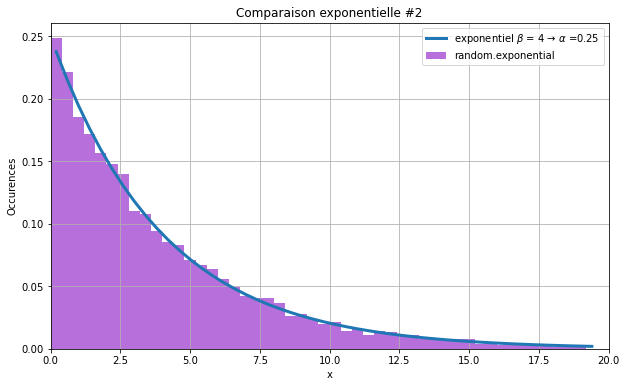

In [8]:
beta=4
exp=np.random.exponential(beta,10000)

binwidth=0.4 #Défini la largeur des colonnes
bins=np.arange(0.,20., binwidth) #Défini les valeurs sur lequel notre commande va s'exécuter (en précisant le pas avec binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins

plt.figure(figsize=(10,6))
plt.title('Comparaison exponentielle #2')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(exp,bins=np.arange(0.,20., binwidth),density=True, color="darkorchid", alpha=0.7, label='random.exponential')
plt.plot(xc,np.exp(-xc/beta)/beta,label='exponentiel $\\beta$ = 4 $\\to$ $\\alpha$ =0.25',
            color='C0', linestyle='-',lw=3)
plt.legend(loc='upper right')
plt.grid()
plt.xlim(0.,20.)

## Exercice 2:
Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.

Encodons la méthode de Box-Muller

(-5.0, 5.0)

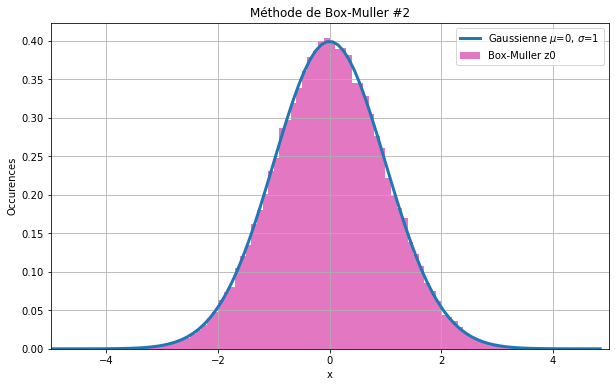

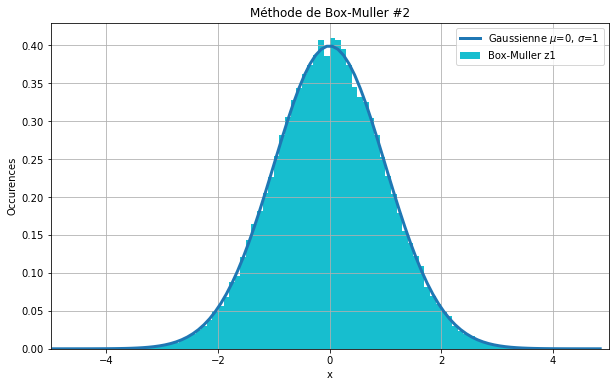

In [9]:
N = 100000

u1 = np.random.random_sample(N)
u2 = np.random.random_sample(N)

z0 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
z1 = np.sqrt(-2*np.log(u2))*np.sin(2*np.pi*u1)


binwidth=0.1
bins=np.arange(-5,5, binwidth)
xc = bins[:-1] + binwidth/2 # Centrons nos bins

#--------------------------------------------- Box-Muller z0 graphe
plt.figure(figsize=(10,6))
plt.title('Méthode de Box-Muller #2')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(z0,bins,density=True, label='Box-Muller z0',
            color='C6', linestyle='-',lw=3)# Plots de z0
plt.plot(xc,np.exp(-0.5*(xc)**2)/np.sqrt(2*np.pi),label='Gaussienne $\\mu$=0, $\\sigma$=1',
            color='C0', linestyle='-',lw=3)
plt.legend(loc='upper right')
plt.grid()
plt.xlim(-5.,5.)

#--------------------------------------------- Box-Muller z1 graphe
plt.figure(figsize=(10,6))
plt.title('Méthode de Box-Muller #2')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.hist(z1,bins,density=True, label='Box-Muller z1',
            color='C9', linestyle='-',lw=3)# Plots de z1
plt.plot(xc,np.exp(-0.5*(xc)**2)/np.sqrt(2*np.pi),label='Gaussienne $\\mu$=0, $\\sigma$=1',
            color='C0', linestyle='-',lw=3)
plt.legend(loc='upper right')
plt.grid()
plt.xlim(-5.,5.)

## Exercice 3
Add as systematic contribution to the displacement $dx$,

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?

Remarquons tout d'abord que que la contribution cdt est indépendant de second terme du membre de droit de notre équation. Ainsi, cdt ne fait que simplement translater notre gaussienne de manière constante à chaque élément dt.

Notre moyenne aura donc évolué, à un l'instant t donné, de $$\mu_t = \mu + ct$$

Notre $\sigma$, quant à lui, reste inchangé et est donc identique à sa forme sans terme de translation.
$$\to \sigma_t = \sigma^2 + 2\alpha t$$

Ainsi, notre densité correspond à 

$$
\rho(x,t)=\frac{1}{\sigma_t\sqrt{2\pi}}\cdot \exp{-\frac{(x-\mu)^2}{2\sigma^2}} \quad (1)
$$

Posons à présent 
$$y=x-ct$$

$$ \Rightarrow dy=\sqrt{2\alpha dt}\cal{N(0,1)}$$


L'équation d'évolution de la densité est donc le même que pour le processus sans terme de translation
\begin{align}
\frac{\partial \rho}{\partial t}& =\alpha \frac{\partial^2 \rho}{\partial y^2}\\
 & =\alpha \left(\frac{\partial}{\partial x}-\frac{1}{c}\frac{\partial}{\partial t}\right)^2 \cdot\rho
\end{align}


La marche aléatoire évolue donc ainsi:

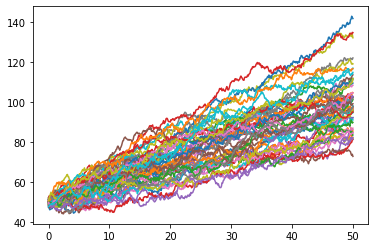

In [10]:
T=50.0
nt=500
dt=T/nt
alpha=2
c=1

sigma=1.0
mu=50.0
x0=np.random.normal(mu,sigma,100000)

t=np.arange(0,T+dt,dt)
x=np.empty([nt+1,100000])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,100000)+c*dt

for i in range(50):
    plt.plot(t,x[:,i])

Remarquons que le terme de translation fait "dériver" notre marche aléatoire vers les x positif. La constante c nous permet donc de modifier le sens de la marche (en fonction de son signe) et son intensité si nous prenons $c \neq 1$. Bien évidemment c=0, nous redonne une marche aléatoire comme vu durant le mooc.

Enfin, remarquons que notre solution est, à nouveau, assimilable à une gaussienne. Plotons en histogramme les positions obtenues lors de la dernière phase de la simulation et comparons là avec la gaussienne prédit en $(1)$

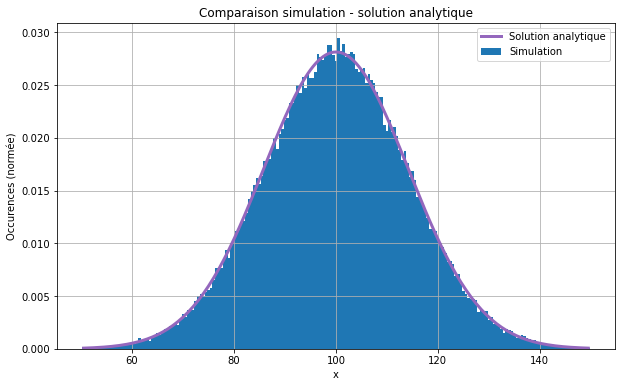

In [11]:
mut=mu+c*T
sigmat=2*alpha*T+sigma**2

#---------------------------------- Générons les colonnes de l'histogramme
binwidth=0.5
bins=np.arange(-50+mut,50+mut,binwidth)
bins = bins + binwidth/2
bin_centers = bins[:-1]+binwidth/2

#---------------------------------- Plot
plt.figure(figsize=(10,6))
plt.title('Comparaison simulation - solution analytique')
plt.xlabel('x')
plt.ylabel('Occurences (normée)')
plt.hist(x[nt],bins,density=True,label='Simulation')
plt.plot(bin_centers, np.exp(-(bin_centers-mut)**2/(2.0*sigmat))/np.sqrt(2*np.pi*sigmat),label='Solution analytique',
            color='C4', linestyle='-',lw=3)
plt.legend(loc='upper right')
plt.grid()
#plt.xlim(-50.,50.)

## Exercice 4
Simulate the following random walk with a 'friction' term:

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!

## Exercice 5
Check that this (the fact that the Metropolis algortithm generated the right proportion of states) is not a coincidence and that the metropolis algorithm gives the correct ratio of "ups" and "downs" for different lattice configurations. You may use the following routine to generate different ones with random initial dipole orientations.

In [12]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = np.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [13]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [14]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (np.random.random_sample()<np.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

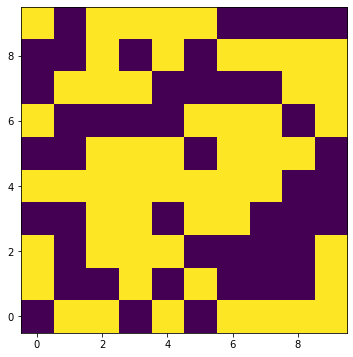

In [15]:
nx=10
ny=10
r = initial_state(nx,ny)
alpha=0.1
#--------------------------- graphe
plt.figure(figsize=(6,6))
plt.imshow(r,interpolation="none",origin='lower')

In [16]:
print(energy_at_site(r,alpha,r[5,5],5,5))

0.4


Nous allons maintenant créer une routine permettant de générer n fois la procédure précédent et allons print le ratio pour chaque itération.

In [17]:
def check_ratio(n,NMC):
    nx, ny = 10, 10
    alpha = 0.1
    
    theo, ratios = np.empty(n), np.empty(n)
    
    for i in range(n):
        sp=initial_state(nx,ny)
        
        energy1 = energy_at_site(sp,alpha,-1,5,5)
        energy_mod = energy_at_site(sp,alpha, 1,5,5)

        states = np.empty(NMC)
        states[0]=sp[5,5]

        for m in range(0,NMC):
            
            metropolis_at_site(sp,alpha,5,5)
            states[m]=sp[5,5]

        ups = np.extract(states==1, states).size
        downs = NMC - ups
        theo[i] = np.exp(energy1-energy_mod)
        ratios[i] = ups/downs
    return [theo,ratios]

In [18]:
[theo,ratios]= check_ratio(10,100000)
print("Les valeurs théoriques attendues sont:\n", theo,"\n Les ratios obtenus quant à eux sont:")
print(ratios)

Les valeurs théoriques attendues sont:
 [1.         1.4918247  1.4918247  0.67032005 0.67032005 0.67032005
 1.4918247  2.22554093 1.4918247  1.4918247 ] 
 Les ratios obtenus quant à eux sont:
[1.         1.49981251 1.49656722 0.67117885 0.67355614 0.66686113
 1.49301955 2.22747224 1.49644257 1.48583076]


## Question 6
Perform a series of runs with $\alpha \in [0,1]$ and plot the average energy of the system and its magnetisation as a function of 𝛼. Estimate the critical value of 𝛼 at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?

In [19]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = np.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=np.random.randint(0,nx)
            iy=np.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [20]:
nx, ny = 10, 10
NMC = 20

alpha=0.1
sp = np.ones([nx,ny])
states = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [ ]:
nx, ny = 100, 100
NMC = 100


alphas=np.linspace(0,1,11)
states=np.empty([nx,ny])


sp = np.ones([nx,ny])
    
fig = plt.figure(figsize=(6,3))
states_0 = ising_model_metropolis(sp, NMC, nx, ny, alphas[0])
plt.subplot(3, 4, 1)
img0 = plt.imshow(states_0[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

#states_1 = ising_model_metropolis(sp, NMC, nx, ny, alphas[1])
#plt.subplot(3, 4, 1)
#img1 = plt.imshow(states_0[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

states_2 = ising_model_metropolis(sp, NMC, nx, ny, alphas[2])
plt.subplot(3, 4, 1)
img2 = plt.imshow(states_0[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

#states_3 = ising_model_metropolis(sp, NMC, nx, ny, alphas[3])
#plt.subplot(3, 4, 1)
#img3 = plt.imshow(states_0[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

states_4 = ising_model_metropolis(sp, NMC, nx, ny, alphas[4])
plt.subplot(3, 4, 1)
img4 = plt.imshow(states_1[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

#states_5 = ising_model_metropolis(sp, NMC, nx, ny, alphas[5])
#plt.subplot(3, 4, 1)
#img5 = plt.imshow(states_0[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

states_6 = ising_model_metropolis(sp, NMC, nx, ny, alphas[6])
plt.subplot(3, 4, 1)
img6 = plt.imshow(states_0[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

#states_7 = ising_model_metropolis(sp, NMC, nx, ny, alphas[7])
#plt.subplot(3, 4, 1)
#img7 = plt.imshow(states_2[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

states_8 = ising_model_metropolis(sp, NMC, nx, ny, alphas[8])
plt.subplot(3, 4, 1)
img8 = plt.imshow(states_0[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

#states_9 = ising_model_metropolis(sp, NMC, nx, ny, alphas[9])
#plt.subplot(3, 4, 1)
#img9 = plt.imshow(states_0[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

states_10 = ising_model_metropolis(sp, NMC, nx, ny, alphas[10])
plt.subplot(3, 4, 1)
img10 = plt.imshow(states_0[0],interpolation="none",origin='lower',vmin=-1, vmax=1)




def animate(j):
    img0.set_array(states_0[j])
    #img1.set_array(states_1[j])
    img2.set_array(states_2[j])
    #img3.set_array(states_3[j])
    img4.set_array(states_4[j])
    #img5.set_array(states_5[j])
    img6.set_array(states_6[j])
    #img7.set_array(states_7[j])
    img8.set_array(states_8[j])
    #img9.set_array(states_9[j])
    img10.set_array(states_10[j])

    
anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
plt.close()
HTML(anim.to_html5_video())

C:\Users\Ismaël\Documents\Divers\Codes\Python\python-3.7.6.amd64\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Ismaël\Documents\Divers\Codes\Python\python-3.7.6.amd64\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [35]:
def init_energy(sp,alpha):
    """ Calcule l'energie d'une grille de spins.
   
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha  : reél
        constante de couplage J/(kb*T)
    
    Returns:
    -------
    Energie_tot/2 = energie totale de la configuration divisée par deux
    car on somme sur les paires de spins
    """
    nx=ny=len(sp[0])
    E_tot= 0
    for m in range(nx):
        for l in range(ny):
            sigma=sp[l,m]
            E_tot=energy_at_site(sp,alpha,sigma,m,l)+E_tot
    return E_tot/2 

def average_energy(states,alpha,NMC):
    """ Calcule l'energie moyenne d'une succéssion de configurations, pour 
     un même alpha.
    
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha  : reél
        constante de couplage J/(kb*T)
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis.
    
    Returns:
    -------
    en_moy_norm = liste des énergies moyennes pour chaque suite d'états.
    """
    
    e_moy_norm, e_moy_non_norm = np.empty(NMC+1), np.empty(NMC+1)
    e_moy_norm[0], e_moy_non_norm[0] = init_energy(states[0],alpha), init_energy(states[0],alpha)
    
    for n in range(1,NMC+1):
        e_moy_non_norm[n] = (energy_one_config(states[n],alpha) + e_moy_non_norm[n-1])
    
    for m in range(1,NMC+1):
        e_moy_norm[m]=(e_moy_non_norm[m]/(m+1))
        
    return e_moy_norm

In [36]:
def init_magn(sp):
    """ Calcule la magnétisation d'une grille de spins.
   
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    
    Returns:
    -------
    magn_tot = magnétisation totale de la configuration.
    """
    nx=ny=len(sp[0])
    magn_tot=0.
    for m in range(nx):
        for l in range(ny):
            sigma=sp_test[l,m]
            magn_tot=sigma+magn_tot
    return magn_tot 

def average_magn(states,NMC):
    """ Calcule la magnétisation moyenne d'une succéssion de configurations.
    
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis.
    
    Returns:
    -------
    magn_moy_norm = liste des magnétisations moyennes pour chaque suite d'états.
    """
    
    magn_moy_norm, magn_moy_non_norm = np.zeros(NMC+1), np.zeros(NMC+1)
    magn_moy_norm[0], magn_moy_non_norm[0] =  init_magn(states[0]), init_magn(states[0])
    
    for n in range(1,NMC+1):
        magn_moy_non_norm[n] = (magn_one_config(states[n]) + magn_moy_non_norm[n-1])
    
    m=1    
    for m in range(1,NMC+1):
        magn_moy_norm[m]= (magn_moy_non_norm[m])/(m+1)
        
    return magn_moy_norm

## Sources:
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_exponential.html?highlight=standard%20random

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html?highlight=exponential%20random#numpy.random.exponential

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html?highlight=standard%20random

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html?highlight=standard%20random

- https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller

- https://en.wikipedia.org/wiki/Ising_model#Onsager's_exact_solution